In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pymongo import MongoClient

In [2]:
client = MongoClient('127.0.0.1',
                     username="root",
                     password="rootpassword")

collection = client['performance'].get_collection("perf")

data = pd.DataFrame(list(collection.find()))
data.head()

,_id,submit_time,compute_platform,requested_cpu,requested_mem,requested_disk,input_file_size,input_file_compression,input_file_time,pipeline,start_time,output_file_size,output_file_compression,output_file_time,end_time,event
0,2662743237,07-13-2021 17:04:30.202611,jgi,25,5,4,3,True,7140.0,pipeline_1,07-13-2021 19:00:30.202611,60.0,False,7680.0,07-13-2021 21:06:30.202611,0
1,1918449648,07-13-2021 17:04:30.227427,pnnl,25,9,3,3,False,6780.0,pipeline_2,07-13-2021 19:04:30.227427,60.0,True,6480.0,07-13-2021 21:03:30.227427,1
2,4136153850,07-13-2021 17:04:30.229047,aws,22,8,4,0,False,7140.0,pipeline_4,07-13-2021 19:06:30.229047,0.0,False,7440.0,07-13-2021 21:08:30.229047,2
3,3704115299,07-13-2021 17:04:30.230325,cori,27,10,4,1,True,6900.0,pipeline_2,07-13-2021 19:07:30.230325,0.0,True,7920.0,07-13-2021 21:11:30.230325,3
4,3853719958,07-13-2021 17:04:30.231472,cori,18,8,4,4,True,7320.0,pipeline_4,07-13-2021 19:13:30.231472,180.0,False,7680.0,07-13-2021 21:10:30.231472,4


In [ ]:
data.info(verbose=True, memory_usage='deep')

In [3]:
parse_dates = ['submit_time', 'start_time', 'end_time']
for d in parse_dates:
    data[d] = pd.to_datetime(data[d])

convert_dtype = {'_id': "string",
                 'compute_platform': "string",
                 'requested_cpu': 'int8',
                 'requested_mem': 'int8',
                 'requested_disk': 'int8',
                 'input_file_size': 'int32',
                 'input_file_compression': 'bool',
                 'input_file_time': 'float32',
                 'pipeline': 'string',
                 'output_file_size': 'int32',
                 'output_file_compression': 'bool',
                 'output_file_time': 'float32'}
    
for d, t in convert_dtype.items():
    data[d] = data[d].astype(t)

In [ ]:
dict(data.dtypes)

In [ ]:
data.info(verbose=True, memory_usage='deep')

In [ ]:
data.head()

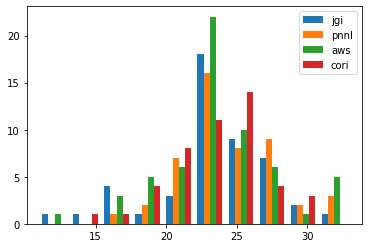

In [4]:
platform = data.compute_platform.unique()
plt.hist([data.loc[data.compute_platform == x, 'requested_cpu'] for x in platform], label=platform)
plt.legend()

In [5]:
data['full_runtime'] = data.end_time - data.submit_time
data['full_runtime'] = data['full_runtime'].apply(lambda x: x.value)

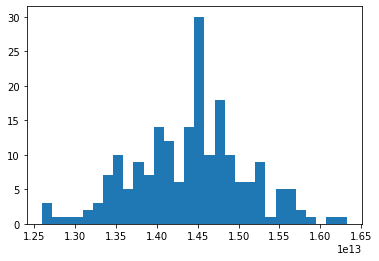

In [6]:
plt.hist(data.full_runtime, bins=30)
plt.show()

In [ ]:
platform = data.compute_platform.unique()
plt.hist([data.loc[data.compute_platform == x, 'full_runtime'] for x in platform], label=platform, bins=20)
plt.legend()